# MATH5271 Lab 2

# Time Series Analysis

Welcome to the 2nd MATH5271 lab session. In this lab we will explore time series analysis using frequency domain methods using python. By the end of this lab you should be able to

- Fit specific harmonics (sine and cosine functions) to data using least squares and integration methods,
- Use Fast Fourier Transform (FFT) functions and interpret their results and
- Use ideas related to the Nyquvist frequency to understand aliased signals.

## Google Colaboratory

We will run the python labs in [Google Colaboratory](colab.research.google.com). Google Colab is a web-based computational environment in which you can read, write, and execute interactive *notebooks* like the one you are reading. The python code runs on a virtual machine in the cloud, so you don't need to install python on your local machine. 

Before you begin the lab, you will need to [sign up](https://accounts.google.com/signup) for a free Google account. If you do not wish to sign up for a Google account, that's fine: you will still be able to read through the lab. You just won't be able to make edits or run any code. 

## Colaboratory and Google Drive

If you have a Google account, you can mount your Google drive within the Colab environment. This is not required to run the lab (figures and movies will be saved to the Colab virtual machine and played in your browser). But if you would like to save output you can do so by navigating to `drive/'My Drive'`

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'

## 1. Setup and Load Data

Before we get started analysing some data we need to ensure we have the appropriate 'libraries' installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) packkage to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [3]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline
 


I have copied the example data 8.6 (9.6 or 10.6 depending on your version) from Wilks into csv files and am storing these on github.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots). 

In [4]:
# Define the URL where the data set is stored
df_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_Table8.6.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df = pd.read_csv(df_url)

# Let's look at all the data
pd.set_option('display.max_rows', 100) # Without this it will only show a few rows
display(df)

,Month,Year,Temp_Far,Location
0,1,1987,21.4,Ithaca
1,2,1987,17.9,Ithaca
2,3,1987,35.9,Ithaca
3,4,1987,47.7,Ithaca
4,5,1987,56.4,Ithaca
5,6,1987,66.3,Ithaca
6,7,1987,70.9,Ithaca
7,8,1987,65.8,Ithaca
8,9,1987,60.1,Ithaca
9,10,1987,45.4,Ithaca


## 1. Fitting Harmonics

As discussed in Wilks, there are a few ways of fitting a harmonic to a data set. Let's first define a harmonic with a sin and a cosine curve

$$ A_k \cos\left(\frac{2\pi i k}{n}\right) + B_k \sin\left(\frac{2\pi i k}{n}\right) $$

where $k$ is the order of the harmonic (between 1 and $n$/2) and $n$ is the number of data points in the time series (assuming constant spaceing of data).

Clearly the temperature data is likely to have an annual cycle and since we have 2 years this means $k = 2$. Let's define the cosine and sine functions for $k=2$ and plot them.

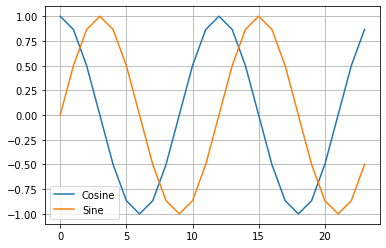

In [5]:
k = 2 
i = np.arange(0,df.Temp_Far.size); # Effectively the number of the month
cosfnc = np.cos(2*np.pi*i/12)
sinfnc = np.sin(2*np.pi*i/12)
plt.plot(cosfnc,label ='Cosine')
plt.plot(sinfnc,label ='Sine')
plt.grid()
plt.legend()

### Least Squares
If we want to fit just a single harmonic, then an obvious approach is 'Least Squares' where find $A_k$ and $B_k$ such 

$$ y_i - \overline{y} = A_k \cos\left(\frac{2\pi i k}{n}\right) + B_k \sin\left(\frac{2\pi i k}{n}\right) + \epsilon_i $$

and the root mean square of the error term ($\sum \epsilon_i^2$) is minimised. 

In order to exploit powerful linear algebra methods we can cast the above problem into matrix form such that 

$$ A \bf{x} = \bf{y} - \bf{E} $$

Where $A$ is a 2 x $n$ matrix containing the cosine and sine functions, $\bf{x} = [A_k,B_k]$. Let's try this and minimise the error using numpy's linear algerbar - least squares function.


[-23.73976703  -2.16385117]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Text(0.5, 0, 'Month')

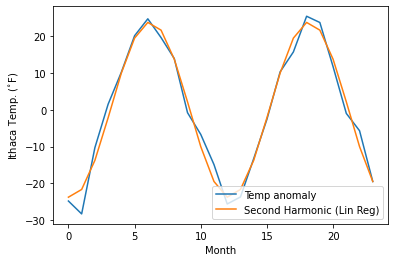

In [ ]:
# Define A and y such that Ax = y
A = np.array([cosfnc,sinfnc]).transpose()
y = df.Temp_Far-df.Temp_Far.mean()
# solve x = inv(A)*y
x_reg = np.linalg.lstsq(A, y)

y_2nd_harmonic_reg = np.dot(A,x_reg[0]) # x_reg[0] * cosfnc + x_reg[1] * sinfnc

print(x_reg[0])
plt.plot(i,df.Temp_Far-df.Temp_Far.mean(),label ='Temp anomaly')
plt.plot(i,y_2nd_harmonic_reg,label ='Second Harmonic (Lin Reg)')
plt.legend()
plt.ylabel('Ithaca Temp. ($^{\circ}$F)')
plt.xlabel('Month')


### Summation formula

Least squares is actually not necassary in this case. We can actually compute a coefficient using the summation formulae

$$ A_k = \frac{2}{n}\sum_{i=1}^{n}y_n\cos\left(\frac{2\pi i k}{n}\right)$$

and
$$ B_k = \frac{2}{n}\sum_{i=1}^{n}y_n\sin\left(\frac{2\pi i k}{n}\right).$$

Let's try this.


In [ ]:
n = i.shape[0]
k = 2
A2 = (2/n)*np.sum(y*cosfnc)
B2 = (2/n)*np.sum(y*sinfnc)
print(A2,B2)

-23.739767027193714 -2.163851173473855


We can define a function which can compute the coefficients for any order we like.


In [ ]:
def fourtrans(y,k): # y = data, k = harmonic
  n = y.shape[0]
  A_k=(2/n)*np.sum(y.values*np.cos(2*np.pi*k*np.arange(0,n)/n))
  B_k=(2/n)*np.sum(y.values*np.sin(2*np.pi*k*np.arange(0,n)/n))
  return (A_k, B_k)
[A,B] = fourtrans(y,6)
print([A,B])
np.sqrt(A**2+B**2)

[-1.5333333333333354, -2.150000000000004]


2.6407595708642493

## 3. Fast Fourier Transform and Periodogram
We can diagnose the same things using Fast Fourier Transform algorithms. There is a package inbuilt in numpy.

The fast fourier transform actually computes a complex coefficients ($H_k$) using

$$ 
H_k = \sum_{i=1}^{n}y_n\exp^{-i\left(\frac{2\pi i k}{n}\right)}.
$$

We need to multiply the result by $2/n$ to make it fit with the working above.


[ -0.0678948  -23.73976703  -1.01445887  -0.50833333  -0.06188198
  -1.53333333  -0.57380162  -0.38333333   1.53112554   0.14810036
   0.58691174]
[-0.45408252  2.16385117 -0.46070226  1.1691343   0.3734639   2.15
  0.12035501  0.28867513 -0.01070226 -0.18885117 -0.10097363]
[ 0.45913031 23.83817926  1.11416937  1.27486383  0.37855602  2.64075957
  0.58628801  0.47987267  1.53116294  0.23999684  0.59553427]


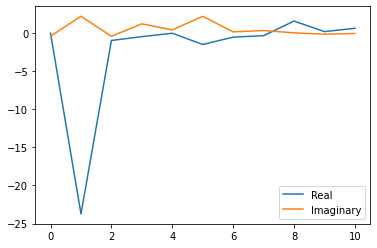

In [ ]:
sp = np.fft.rfft(y,n)/(n/2)
plt.plot(sp.real[1:int(n/2)],label='Real')
plt.plot(sp.imag[1:int(n/2)],label='Imaginary')
plt.legend()
print(sp.real[1:int(n/2)])
print(sp.imag[1:int(n/2)])
print(abs(sp[1:int(n/2)]))

<BarContainer object of 11 artists>

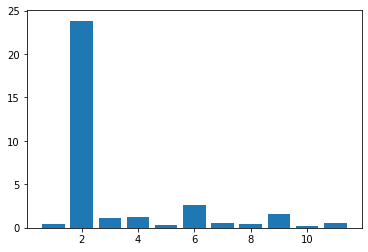

In [ ]:
plt.bar(np.arange(1,int(n/2)),abs(sp[1:int(n/2)]))

# 5. Exercise

----

Get into groups of 3-4 and complete the following:

1.   Explore ways of removing the sesonal cycle from the Ithaca temperature data using the methods above. What is the general way to construct a time series with/without certain modes of variability.

2.   Add in higher frequency modes of variability to the Ithaca times series. Show how these can be picked up bu the FFT and also iullustrate how they may not. Discuss in relation to the Nyquvist frequency.

3.   Looking why Wilks' values are different.


----

# 6. Extra

If everyone in your group is finished and getting bored here are a few things you can get started on:

 - Go to the Australian Buerau of Meterorlogy's website and download data for your first assessment task and begin to explore with your group.